## 任务描述

1. 掌握PCA相关概念

2. 掌握PCA的方法步骤

## 相关知识

**PCA(Principal Component Analysis)，即主成分分析方法**，是一种使用最广泛的数据降维算法。PCA主要思想是将n维特征映射到k维上，这k维是全新的正交特征也被称为主成分，是在原有n维特征的基础上重新构造出来的k维特征。

**标准差（Standard Deviation）**

在引入标准差之前，我先介绍一下平均值，假设我们有个样本集X，其中的样本为X=[1,2,3,4,5,6]，

求平均值的公式如下：

![jupyter](https://i.loli.net/2021/05/14/oiFc9Y5sNqzhAJP.png)
 

求平均值的python代码如下：

In [1]:
import numpy as np
X=np.array([1,2,3,4,5,6])
print('平均值为：',np.mean(X))

平均值为： 3.5


然而平均值并没有告诉我们关于样本集的很多信息。比如[0,8,12,20]和[8,9,11,12]的平均值都是10，但是它们的数据分散程度有着明显的不同。因此，我们并不满足于仅仅求出一个小小的平均值。

下面让我们引入标准差，它度量着数据的分散程度。它的公式如下：

![jupyter](https://i.loli.net/2021/05/14/tAULDhVeWTzEYaB.png)

求标准差的python代码如下：

In [2]:
import numpy as np
X=np.array([1,2,3,4,5,6])
print('标准差为：',np.std(X))

标准差为： 1.707825127659933


**方差（Variance）**

方差和标准差一样，都是度量着数据的分散程度。它的公式就是标准差的平方，如下： 
![jupyter](https://i.loli.net/2021/05/14/Dx93F14sK5uLNUq.png)

求方差的python代码如下：

In [3]:
import numpy as np
X=np.array([1,2,3,4,5,6])
print('方差为：',np.var(X))

方差为： 2.9166666666666665


**协方差(Covariance)**

方差和标准差只能操作一维的数据集，但是在现实生活中，样本可能有很多的特征，也就是说你的数据集有可能是很多维的。但是，测量样本特征之间的关系很有必要，比如说：我们的样本有2个特征，一个是你的学习时间，一个是你的成绩，那么正常情况下，一定是你的学习时间越长，你的成绩越好。但是，方差和标准差不能度量这种特征之间的关系，而协方差可以。

假设我们有两个特征X，Y。计算它们之间的协方差公式为：
![jupyter](https://i.loli.net/2021/05/14/vc26gAWqSjswJla.png)

从上面的公式我们能看出cov(X,Y)和cov(Y,X)的值是一样的。

协方差具体的大小并不重要，但是它的正负是重要的。如果它的值是正的，这表明两个特征之间同时增加或减小;如果它的值是负的，这表明两个特征之间有一个增加而另一个减小。如果它的值为0，则表明两个特征之间是独立的。

**特征向量（Eigenvectors）与特征值（Eigenvalues）**

特征向量是非零向量，当线性变换应用到特征向量时并不会改变它的方向。换句话说：如果v是一个非零向量，要想v是线性变换T的特征向量，则T(v)是一个标量

值乖上v，它可以被写成如下形式：

   $$T(v)=λv$$                                                     
   
  λ是一个标量，并且它也是关联着特征向量v的特征值
 
如果线性变换T被表示成作为一个方阵A的变换，那么上面的等式可以写成如下形式：

  $$Av=λv$$      
   
   v是列向量

**主成分分析(Principal Components Analysis)**

PCA是一种无监督线性转换技术，它主要应用在降维（dimensionality reduction）上。PCA基于数据特征之间的相关性帮我们找到数据中的模式。简而言之，PCA的目的是在高维数据中找到最大方差的方向，接着映射它到比最初维数小或相等的新的子空间。

下面我们**基于葡萄酒（Wine）数据集**来具体实现主成分分析

**数据标准化**

PCA对数据缩放是相当敏感的，因此，在我们实现PCA的时候，如果数据特征在不同的范围上，我们首先要对数据集标准化。我们接下来使用scikit-learn对数据进行标准化，

In [4]:
import pandas as pd

df_wine = pd.read_csv('../../data/5.1/wine.data', header=None) # 加载葡萄酒数据集

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values # 把数据与标签拆分开来
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) # 把整个数据集的70%分为训练集，30%为测试集

# 下面3行代码把数据集标准化为单位方差和0均值
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

**计算协方差矩阵**

如果你看了上面数据集的描述，每个样本有13个属性（特征），因此协方差矩阵维数应该是13 * 13

In [5]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
cov_mat.shape 

(13, 13)

**计算协方差矩阵的特征向量和特征值**

因为协方差矩阵是方阵，所以我们可以计算它的特征向量和特征值。

In [6]:
import numpy as np
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

eigen_vecs.shape 

(13, 13)

我们上面求得的特征向量都是单位特征向量，它们的长度为1，这对PCA很重要，幸运的是，一些流行的数学包都会给你这样的单位特征向量。下面这幅图的特征是2维的，因此它只有2个特征向量，但是我们的数据集的特征是13维的，我们很难可视化出来。但是，你可以把我们求出的13维特征向量想像成彼此正交的坐标轴，每个方向都指向方差最大的方向。

![jupyter](https://i.loli.net/2021/05/14/i4dzDuNLTZv7tqB.png)

由于我们的特征向量是单位向量，我们只知道它指向的方向，但是，我想知道哪个方向上保留的方差最多，这其实并不难，我们求出的特征值的意义就是特征向量的大小，因此我们只要找出最大特征值所对应的特征向量就可以知道哪个方向保留的方差最多。

下面，我要画出方差解释率（variance explained ratios），也就是每个特征值占所有特征值和的比例。

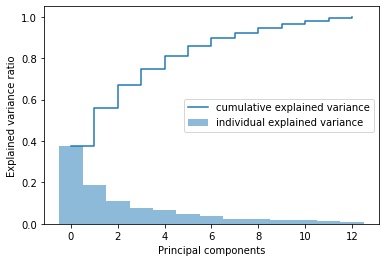

In [7]:
tot = sum(eigen_vals) # 求出特征值的和
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] # 求出每个特征值占的比例（降序）
cum_var_exp = np.cumsum(var_exp) # 返回var_exp的累积和

import matplotlib.pyplot as plt

# 下面的代码都是绘图的，涉及的参数建议去查看官方文档
plt.bar(range(len(eigen_vals)), var_exp, width=1.0, bottom=0.0, alpha=0.5, label='individual explained variance')
plt.step(range(len(eigen_vals)), cum_var_exp, where='post', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


从上图你也看到了，其实2个特征就已经保留了数据集的大部分信息，可见在实际应用中，大部分的特征都是冗余的。注意，有一点你始终要记在心里，PCA是无监督学习算法，这就意味着它会忽视类标签信息。

**特征变换（Feature transformation）**

我们已经成功地把协方差方阵转换成了特征向量和特征值，现在让我们把葡萄酒数据集映射到新的主成分坐标轴吧。为了数据的可视化，我只想把我的数据集映射到2个保留最多方差的主成分。因此，我们要从大到小排序特征值，选出前2个特征值对应的特征向量，并用这2个特征向量构建映射矩阵，用这个映射矩阵把数据集转换到2维空间。

In [8]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))] # 把特征值和对应的特征向量组成对
eigen_pairs.sort(reverse=True) # 用特征值排序

下面，我只选出前2对来构建我们的映射矩阵，但是在实际应用中，你应该权衡你的计算效率和分类器之间的性能来选择恰当的主成分数量。

In [9]:
first = eigen_pairs[0][1]
second = eigen_pairs[1][1]
first = first[:,np.newaxis]
second = second[:,np.newaxis]
W = np.hstack((first,second))

现在，我们已经构建出了13×2维的映射矩阵W，我们可以用这个映射矩阵来转换我们的训练集

X_train_std（124×13维）到只包含2个特征的子空间，用X_train_pca=X_train_stdW，

现在这个2维的新空间我可以可视化了，代码如下：

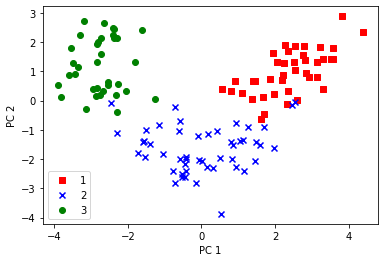

In [10]:
X_train_pca = X_train_std.dot(W) # 转换训练集
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m) # 散点图
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()


从上图我们可以看到在PC 1轴上数据是更加分散的，因此它的方差更大。现在，我们也可以看到数据是**线性可分**的。

## 编程要求

略

## 实战练习

1.主成分分析（PCA）中各因子的关系是（）

A.互相独立

B.线性相关

C.非线性相关

D.都有可能

2.对于PCA说法正确的是: (多选)（）

A.我们必须在使用PCA前规范化数据

B.我们应该选择使得模型有最大variance的主成分

C.我们应该选择使得模型有最小variance的主成分

D.我们可以使用PCA在低维度上做数据可视化

### 参考答案

1. A 
2. A B D